<a href="https://colab.research.google.com/github/yashaswi2311/IBM-Stock-Prediction/blob/master/LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Use  recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (IBM) using the past 60 day stock price.

In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [90]:
#Get the stock quote
df = web.DataReader('IBM', data_source='yahoo', start='2010-01-01', end='2020-03-20')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,132.970001,130.850006,131.179993,132.449997,6155300.0,95.994934
2010-01-05,131.850006,130.100006,131.679993,130.850006,6841400.0,94.835304
2010-01-06,131.490005,129.809998,130.679993,130.000000,5605300.0,94.219246
2010-01-07,130.250000,128.910004,129.869995,129.550003,5840600.0,93.893105
2010-01-08,130.919998,129.050003,129.070007,130.850006,4197200.0,94.835304
...,...,...,...,...,...,...
2020-03-16,107.410004,95.000000,98.000000,99.080002,10568000.0,99.080002
2020-03-17,107.400002,97.099998,100.610001,106.650002,9258300.0,106.650002
2020-03-18,106.930000,99.400002,99.410004,103.550003,8772500.0,103.550003


In [91]:
#Get the number of rows and columns in the data set
df.shape

(2571, 6)

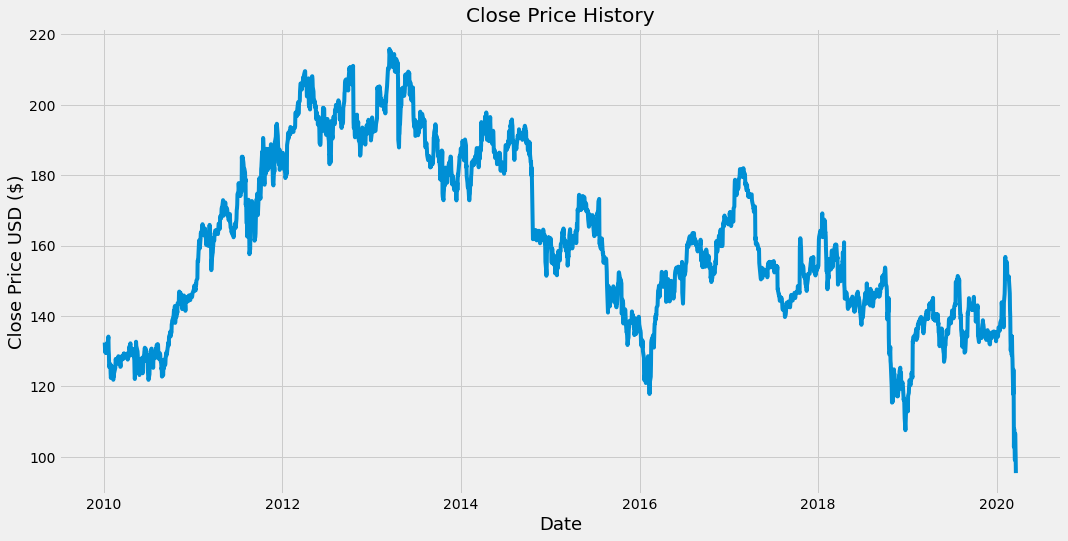

In [92]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [93]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2057

In [94]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.30778172],
       [0.29449386],
       [0.28743459],
       ...,
       [0.06776849],
       [0.04110952],
       [0.        ]])

In [95]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.30778172, 0.29449386, 0.28743459, 0.28369739, 0.29449386,
       0.28311598, 0.29167008, 0.2893447 , 0.30661903, 0.30221741,
       0.32181712, 0.28951083, 0.27912964, 0.25006228, 0.25521138,
       0.25213852, 0.25695541, 0.23552861, 0.22423386, 0.24316915,
       0.25031142, 0.25139111, 0.22929989, 0.23361844, 0.21999831,
       0.23104392, 0.22772193, 0.23536254, 0.23760485, 0.24781997,
       0.25695541, 0.26924672, 0.26409768, 0.26127397, 0.25803504,
       0.26741962, 0.26310107, 0.26384855, 0.27555857, 0.26600779,
       0.2615231 , 0.26019434, 0.26459596, 0.25761983, 0.25047756,
       0.2510589 , 0.26750268, 0.2703264 , 0.26941285, 0.27638899,
       0.26883151, 0.2739806 , 0.26841623, 0.27065861, 0.28220243,
       0.2752263 , 0.28112287, 0.28128888, 0.27572457, 0.27721953])]
[0.2729009186193717]

[array([0.30778172, 0.29449386, 0.28743459, 0.28369739, 0.29449386,
       0.28311598, 0.29167008, 0.2893447 , 0.30661903, 0.30221741,
       0.32181712, 0.28951083, 0.279

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [97]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1997, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1997/1997 [==============================] - 144s 72ms/step - loss: 0.0029


Epoch 1/1
1997/1997 [==============================] - 141s 71ms/step - loss: 0.0034


In [0]:
#Create the testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [105]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.12879192373904

4.682480106267653

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


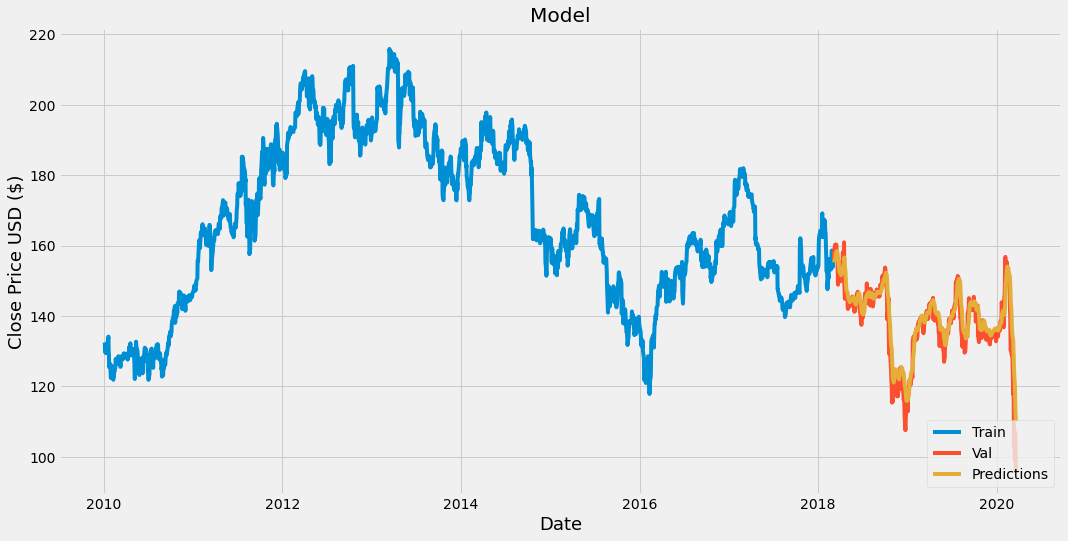

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


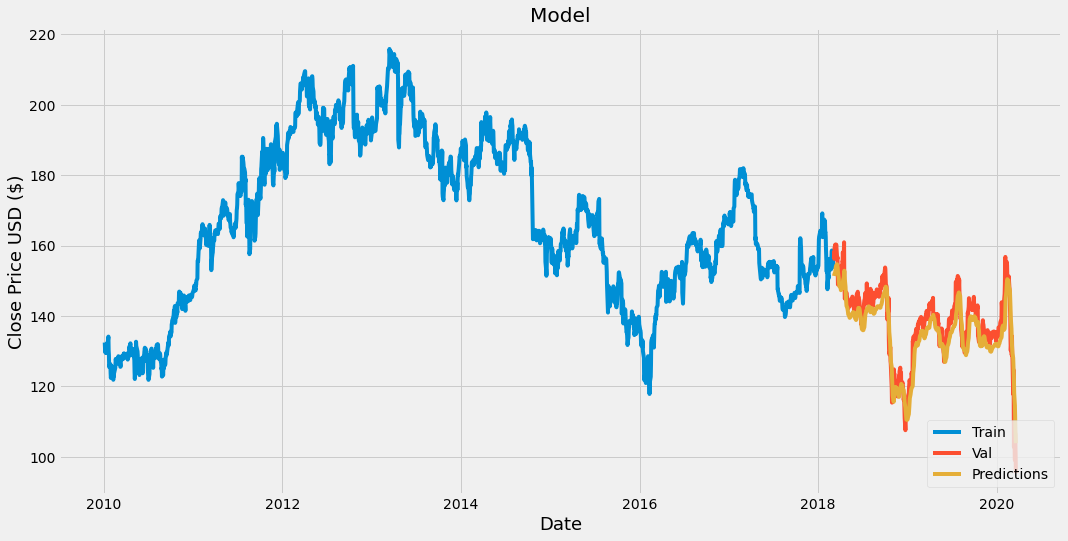

In [106]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [107]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-03-07,158.320007,155.219269
2018-03-08,156.210007,155.605759
2018-03-09,159.309998,155.805054
2018-03-12,160.259995,156.317108
2018-03-13,159.320007,157.027512
...,...,...
2020-03-16,99.080002,120.330276
2020-03-17,106.650002,116.487701
2020-03-18,103.550003,113.870270


,Close,Predictions
Date,,
2018-03-07,158.320007,151.359039
2018-03-08,156.210007,151.771271
2018-03-09,159.309998,151.959686
2018-03-12,160.259995,152.499176
2018-03-13,159.320007,153.245453
...,...,...
2020-03-16,99.080002,114.603500
2020-03-17,106.650002,110.592560
2020-03-18,103.550003,107.889977


In [108]:
#Get the quote
IBM_quote = web.DataReader('IBM', data_source='yahoo', start='2012-01-01', end='2020-03-21')
#Create a new dataframe
new_df = IBM_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[107.92819]]
[[101.700195]]


In [110]:
#Get the quote
IBM_quote2 = web.DataReader('IBM', data_source='yahoo', start='2020-03-20', end='2020-03-20')
print(IBM_quote2['Close'])

Date
2020-03-20    95.389999
2020-03-20    95.389999
Name: Close, dtype: float64
